The library heavily relies on the ESPM and SUNSAL libraries for several calculations.
See:

https://github.com/Laadr/SUNSAL

https://github.com/adriente/espm

In [8]:
importlib.reload(RMB)

<module 'RMB.RMB' from 'C:\\Users\\torruell\\Documents\\GitHub\\RobustMultiscaleBayesian\\RobustMultiscaleBayesian\\RMB\\RMB.py'>

In [7]:
import RMB.RMB as RMB
import espm

In [18]:
s = hs.load("sample_0.hspy")
s.change_dtype("float")

In [19]:
#s.add_elements(['Cu', 'La', 'V', 'O']) # add elements if necessary
s.metadata.Sample.elements

['Cu', 'La', 'V', 'O']

In [20]:
#s.set_signal_type("EDS_espm")
#s.set_additional_parameters() # espm setup

In [21]:
s.build_G() # Generates endmembers for each element and Bremsstrahlung background

In [38]:
maps, uncertainty = RMB.get_RMB_maps(s,[1,3,5],iter_max=2)

Generating multiscale
Done
Calculating Neighbours
Done
BMS calculation
1 / 6
2 / 6
3 / 6
4 / 6
5 / 6
6 / 6


In [24]:
%matplotlib inline

In [40]:
print(maps.shape)
print(uncertainty.shape)
# Last two images correspond Bremsstrahlung background estimation
# to obtain atomic % divide by maps[:-2].sum(-1)

(64, 64, 6)
(64, 64, 6)


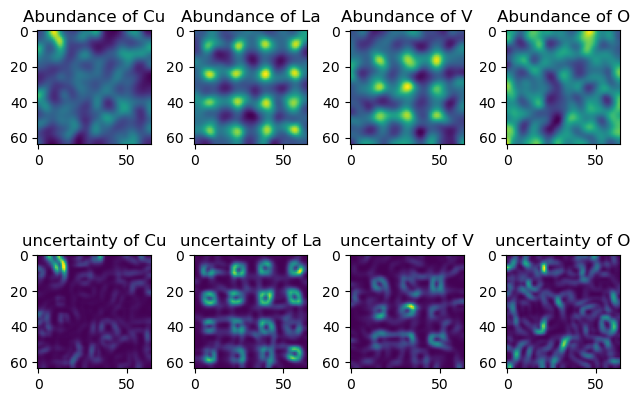

In [39]:
plt.clf()

for i in range(4):
    el = s.metadata.Sample.elements[i]
    ax = plt.subplot(2,4,i+1)
    plt.imshow(maps[...,i])
    ax.set_title("Abundance of {}".format(el))

    ax2 = plt.subplot(2,4,5+i)
    plt.imshow(uncertainty[...,i])
    ax2.set_title("uncertainty of {}".format(el))

plt.tight_layout()

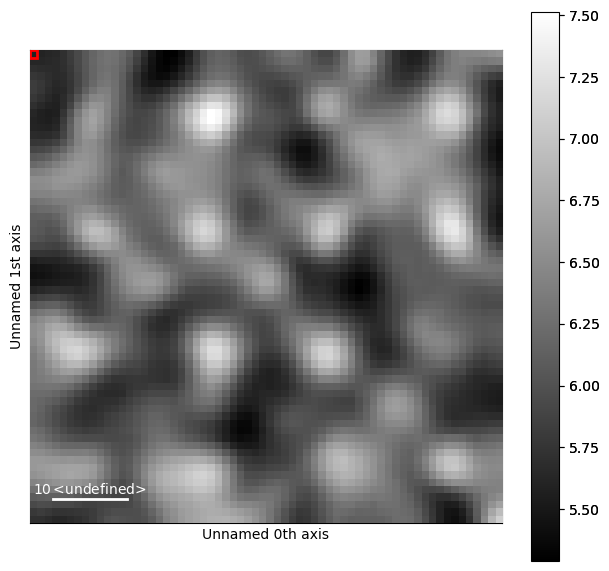

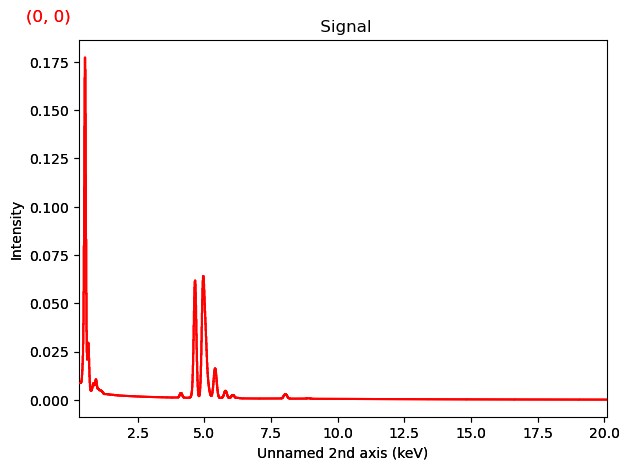

In [47]:
#lets check if our model is reasonable:
model = RMB.build_RMB_model(s,maps,s.G())
model.plot()